# Bayesian Neural networks using pymc3 with pseudo data

In [1]:
import sys
print(sys.version)


3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


In [3]:
import numpy as np
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt

In [4]:
#generate fake data
np.random.seed(123)
n_features = 5
n_samples = 10000
X = np.random.randn(n_samples, n_features)
#set true coeffs
β = np.random.randn(n_features)
#generate outcome
y = np.dot(X,β) + np.random.randn(n_samples)

In [16]:
#build bayesian neural networks
with pm.Model() as bnn:
    #define priors
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10, shape= n_features)
    σ = pm.HalfCauchy('σ', beta=10)
    
    #define likelihood
    likelihood = pm.Normal('y', mu=α + pm.math.dot(X, β), sd=σ, observed =y)
    #inference
    trace = pm.sample(10000, tune=5000, cores=2)
    

C:\Users\Mfund\AppData\Roaming\Python\Python38\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, β, α]


Sampling 2 chains for 5_000 tune and 10_000 draw iterations (10_000 + 20_000 draws total) took 71 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Mfund\AppData\Roaming\Python\Python38\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot: title={'center': 'α'}>

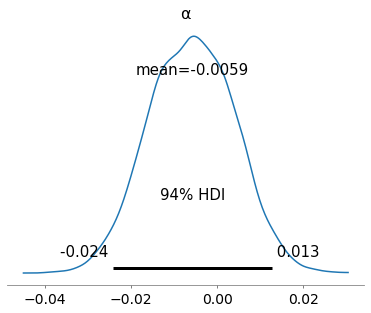

In [6]:

az.plot_posterior(trace, var_names=['α'])

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Mfund\AppData\Roaming\Python\Python38\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot: title={'center': 'α'}>,
        <AxesSubplot: title={'center': 'β\n0'}>,
        <AxesSubplot: title={'center': 'β\n1'}>],
       [<AxesSubplot: title={'center': 'β\n2'}>,
        <AxesSubplot: title={'center': 'β\n3'}>,
        <AxesSubplot: title={'center': 'β\n4'}>],
       [<AxesSubplot: title={'center': 'σ'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

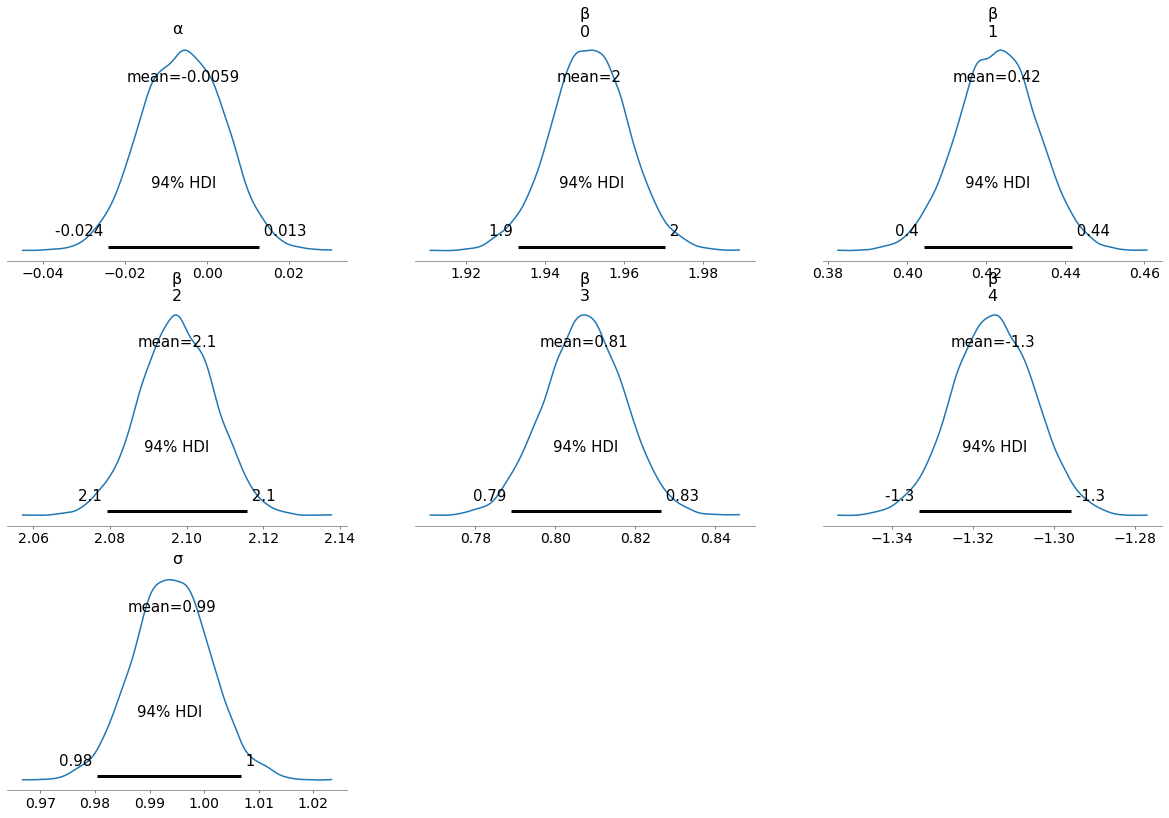

In [13]:
az.plot_posterior(trace)

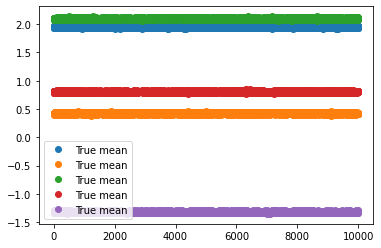

In [15]:
# Extract the values of the true mean coefficients
beta_values = trace.get_values('β')

# Plot the true mean coefficients
plt.plot(beta_values, 'o', label='True mean')
plt.legend()
plt.show()


In [ ]:
# Compute the predicted values
y_pred = np.dot(X, trace['β'].T)

# Compute the confusion matrix
conf_mat = confusion_matrix(y, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8,8))
ax.matshow(conf_mat, cmap=plt.cm.Blues)

plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j], va='center', ha='center')

plt.show()


In [ ]:
# Extract the mean of the posterior samples of the coefficients
posterior_mean = trace.get_values('β').mean(axis=0)

# Extract the standard deviation of the posterior samples of the coefficients
posterior_std = trace.get_values('β').std(axis=0)

# Plot the true mean
plt.plot(β, 'o', label='True mean')

# Plot the posterior mean
plt.plot(posterior_mean, label='Posterior mean')

# Plot the uncertainty
plt.fill_between(range(n_features), posterior_mean - 2*posterior_std, posterior_mean + 2*posterior_std, alpha=0.5, label='Uncertainty')

plt.legend()
plt.show()


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Mfund\AppData\Roaming\Python\Python38\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


TypeError: object of type 'TensorVariable' has no len()

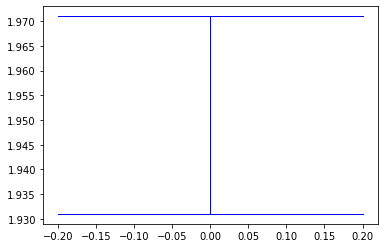

In [22]:
import matplotlib.pyplot as plt

# Extract the mean and standard deviation for each feature
summary = pm.summary(trace, var_names=['β'])
mean = summary['mean']
sd = summary['sd']

# Plot the true mean, posterior mean, and uncertainty for each feature
for i in range(n_features):
    plt.plot([i, i], [mean[i] - 2 * sd[i], mean[i] + 2 * sd[i]], 'b-', lw=1)
    plt.plot([i - 0.2, i + 0.2], [mean[i] - 2 * sd[i], mean[i] - 2 * sd[i]], 'b-', lw=1)
    plt.plot([i - 0.2, i + 0.2], [mean[i] + 2 * sd[i], mean[i] + 2 * sd[i]], 'b-', lw=1)
    plt.plot(i, β[i], 'o', label='True mean')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8,8))
ax.matshow(conf_mat, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j], va='center', ha='center')
plt.show()


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot: title={'center': 'α'}>,
        <AxesSubplot: title={'center': 'α'}>],
       [<AxesSubplot: title={'center': 'β'}>,
        <AxesSubplot: title={'center': 'β'}>],
       [<AxesSubplot: title={'center': 'σ'}>,
        <AxesSubplot: title={'center': 'σ'}>]], dtype=object)

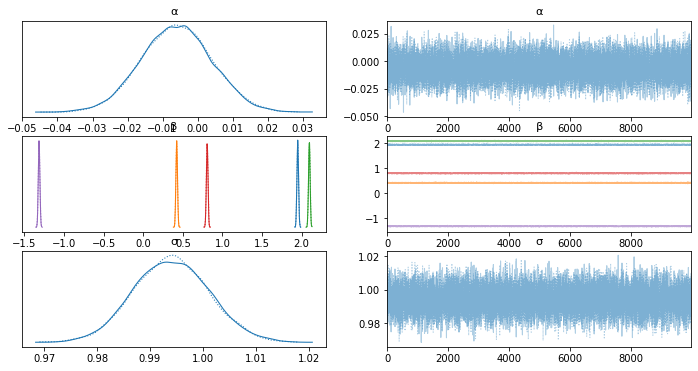

In [25]:
az.plot_trace(trace)